## Uczenie maszynowe – zastosowania
# 11. Wielowarstwowe sieci neuronowe w praktyce

## 11.1. Funkcje aktywacji

* Każda funkcja aktywacji ma swoje zalety i wady.
* Różne rodzaje funkcji aktywacji nadają się do różnych zastosowań.

In [3]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import random

from IPython.display import YouTubeVideo

In [4]:
def plot(fun):
    x = np.arange(-3.0, 3.0, 0.01)
    y = [fun(x_i) for x_i in x]
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlim(-3.0, 3.0)
    ax.set_ylim(-1.5, 1.5)
    ax.grid()
    ax.plot(x, y)
    plt.show()

### Funkcja logistyczna

$$ g(x) = \frac{1}{1 + e^{-x}} $$

* Przyjmuje wartości z przedziału $(0, 1)$.

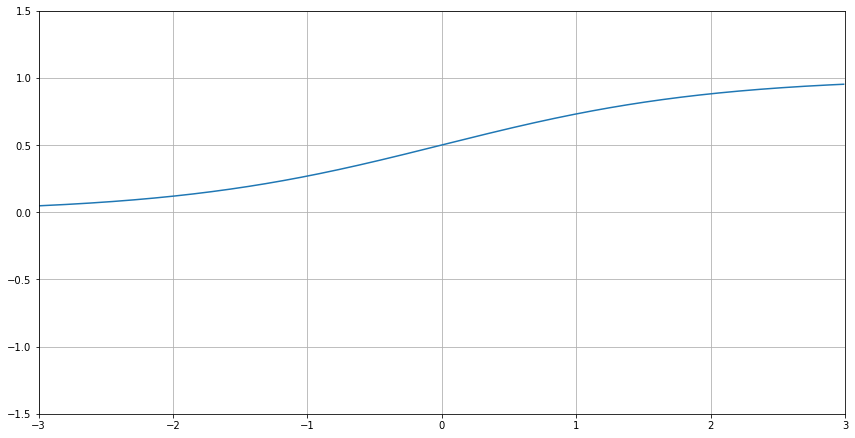

In [5]:
# Wykres funkcji logistycznej
plot(lambda x: 1 / (1 + math.exp(-x)))

### Tangens hiperboliczny

$$ g(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

* Przyjmuje wartości z przedziału $(-1, 1)$.
* Powstaje z funkcji logistycznej przez przeskalowanie i przesunięcie.

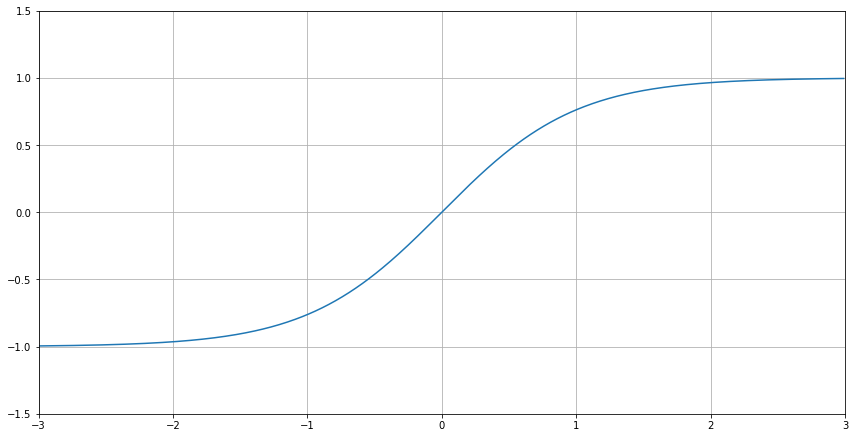

In [6]:
# Wykres funkcji tangensa hiperbolicznego
plot(lambda x: math.tanh(x))

### ReLU (*Rectifier Linear Unit*)

$$ g(x) = \max(0, x) $$

#### ReLU – zalety
* Mniej podatna na problem zanikającego gradientu (*vanishing gradient*) niż funkcje sigmoidalne, dzięki czemu SGD jest szybciej zbieżna.
* Prostsze obliczanie gradientu.
* Dzięki zerowaniu ujemnych wartości, wygasza neurony, „rozrzedzając” sieć (*sparsity*), co przyspiesza obliczenia.

#### ReLU – wady
* Dla dużych wartości gradient może „eksplodować”.
* „Wygaszanie” neuronów.

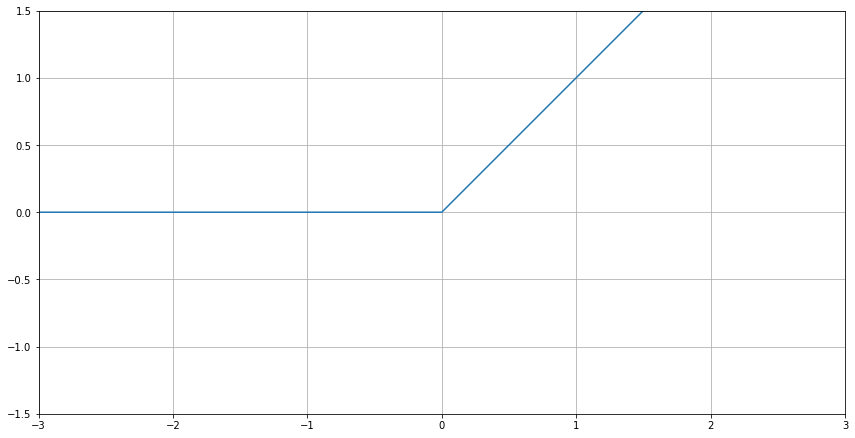

In [7]:
# Wykres fukncji ReLU
plot(lambda x: max(0, x))

### Softplus

$$ g(x) = \log(1 + e^{x}) $$

* Wygładzona wersja ReLU.

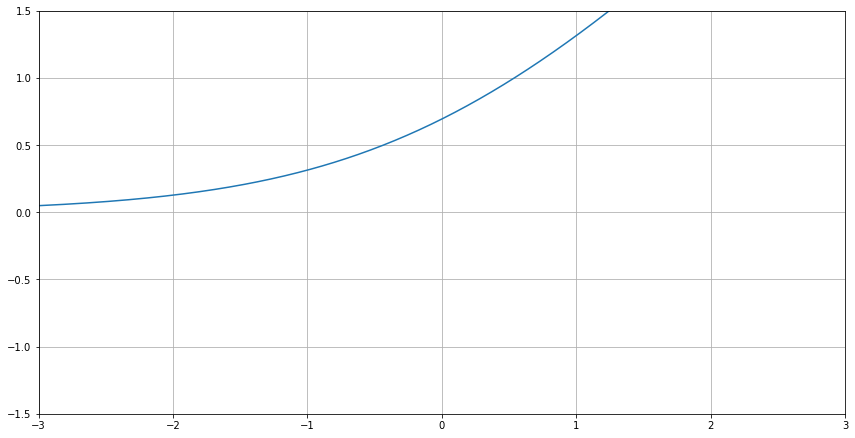

In [8]:
# Wykres funkcji softplus
plot(lambda x: math.log(1 + math.exp(x)))

### Problem zanikającego gradientu (*vanishing gradient problem*)

* Sigmoidalne funkcje aktywacji ograniczają wartości na wyjściach neuronów do niewielkich przedziałów ($(-1, 1)$, $(0, 1)$ itp.).
* Jeżeli sieć ma wiele warstw, to podczas propagacji wstecznej mnożymy przez siebie wiele małych wartości → obliczony gradient jest mały.
* Im więcej warstw, tym silniejszy efekt zanikania.

#### Sposoby na zanikający gradient

* Modyfikacja algorytmu optymalizacji (*RProp*, *RMSProp*)
* Użycie innej funckji aktywacji (ReLU, softplus)
* Dodanie warstw *dropout*
* Nowe architektury (LSTM itp.)
* Więcej danych, zwiększenie mocy obliczeniowej

## 11.2. Odmiany metody gradientu prostego

* Batch gradient descent
* Stochastic gradient descent
* Mini-batch gradient descent

### *Batch gradient descent*

* Klasyczna wersja metody gradientu prostego
* Obliczamy gradient funkcji kosztu względem całego zbioru treningowego:
  $$ \theta := \theta - \alpha \cdot \nabla_\theta J(\theta) $$
* Dlatego może działać bardzo powoli
* Nie można dodawać nowych przykładów na bieżąco w trakcie trenowania modelu (*online learning*)

### *Stochastic gradient descent* (SGD)

* Aktualizacja parametrów dla każdego przykładu:
  $$ \theta := \theta - \alpha \cdot \nabla_\theta \, J \! \left( \theta, x^{(i)}, y^{(i)} \right) $$
* Dużo szybszy niż _batch gradient descent_
* Można dodawać nowe przykłady na bieżąco w trakcie trenowania (*online learning*)

* Częsta aktualizacja parametrów z dużą wariancją:

<img src="http://ruder.io/content/images/2016/09/sgd_fluctuation.png" style="margin: auto;" width="50%" />

* Z jednej strony dzięki temu uczenie nie "utyka" w złych minimach lokalnych, ale z drugiej strony może „wyskoczyć” z dobrego minimum

### _Mini-batch gradient descent_

* Kompromis między _batch gradient descent_ i SGD
  $$ \theta := \theta - \alpha \cdot \nabla_\theta \, J \left( \theta, x^{(i : i+n)}, y^{(i : i_n)} \right) $$
* Stabilniejsza zbieżność dzięki redukcji wariancji aktualizacji parametrów
* Szybszy niż klasyczny _batch gradient descent_
* Typowa wielkość batcha: między 50 a 256 przykładów

### Wady klasycznej metody gradientu prostego, czyli dlaczego potrzebujemy optymalizacji

* Trudno dobrać właściwą szybkość uczenia (*learning rate*)
* Jedna ustalona wartość stałej uczenia się dla wszystkich parametrów
* Funkcja kosztu dla sieci neuronowych nie jest wypukła, więc uczenie może utknąć w złym minimum lokalnym lub punkcie siodłowym

## 11.3. Algorytmy optymalizacji metody gradientu

* Momentum
* Nesterov Accelerated Gradient
* Adagrad
* Adadelta
* RMSprop
* Adam
* Nadam
* AMSGrad

### Momentum

* SGD źle radzi sobie w „wąwozach” funkcji kosztu
* Momentum rozwiązuje ten problem przez dodanie współczynnika $\gamma$, który można trakować jako „pęd” spadającej piłki:
  $$ v_t := \gamma \, v_{t-1} + \alpha \, \nabla_\theta J(\theta) $$
  $$ \theta := \theta - v_t $$

### Przyspiesony gradient Nesterova (*Nesterov Accelerated Gradient*, NAG)

* Momentum czasami powoduje niekontrolowane rozpędzanie się piłki, przez co staje się „mniej sterowna”
* Nesterov do piłki posiadającej pęd dodaje „hamulec”, który spowalnia piłkę przed wzniesieniem:
  $$ v_t := \gamma \, v_{t-1} + \alpha \, \nabla_\theta J(\theta - \gamma \, v_{t-1}) $$
  $$ \theta := \theta - v_t $$

### Adagrad

* “<b>Ada</b>ptive <b>grad</b>ient”
* Adagrad dostosowuje współczynnik uczenia (*learning rate*) do parametrów: zmniejsza go dla cech występujących częściej, a zwiększa dla występujących rzadziej
* Świetny do trenowania na rzadkich (*sparse*) zbiorach danych
* Wada: współczynnik uczenia może czasami gwałtownie maleć

### Adadelta i RMSprop
* Warianty algorytmu Adagrad, które radzą sobie z problemem gwałtownych zmian współczynnika uczenia

### Adam

* “<b>Ada</b>ptive <b>m</b>oment estimation”
* Łączy zalety algorytmów RMSprop i Momentum
* Można go porównać do piłki mającej ciężar i opór
* Obecnie jeden z najpopularniejszych algorytmów optymalizacji

### Nadam
* “<b>N</b>esterov-accelerated <b>ada</b>ptive <b>m</b>oment estimation”
* Łączy zalety algorytmów Adam i Nesterov Accelerated Gradient

### AMSGrad
* Wariant algorytmu Adam lepiej dostosowany do zadań takich jak rozpoznawanie obiektów czy tłumaczenie maszynowe

<img src="contours_evaluation_optimizers.gif" style="margin: auto;" width="60%" />

<img src="saddle_point_evaluation_optimizers.gif" style="margin: auto;" width="50%" />